In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits import mplot3d
from scipy.spatial.distance import cdist

In [139]:
np.random.seed(35)

In [2]:
customer_data = pd.read_csv("Mall_Customers.csv")
print(customer_data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
gender_map = {"Male":1, "Female":0}
customer_data["Gender"] = customer_data["Gender"].apply(lambda x: gender_map[x])

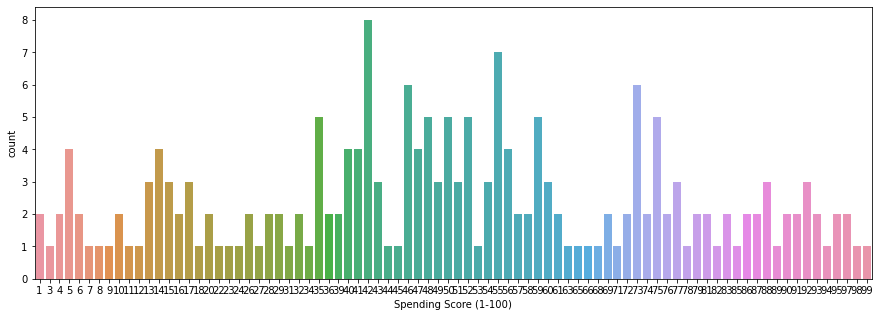

In [4]:
plt.figure(figsize=(15,5))
sns.countplot(customer_data["Spending Score (1-100)"])

Text(0.5, 0, 'Income')

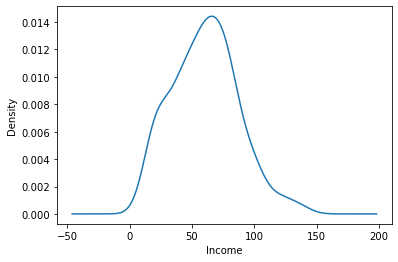

In [5]:
customer_data["Annual Income (k$)"].plot.density()
plt.xlabel("Income")

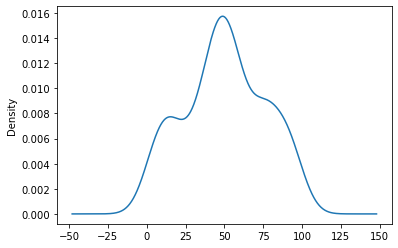

In [6]:
customer_data["Spending Score (1-100)"].plot.density()

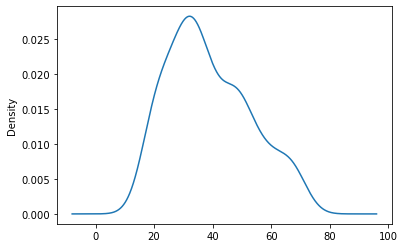

In [7]:
customer_data["Age"].plot.density()

{'whiskers': [<matplotlib.lines.Line2D at 0x1887ffd2438>,
 'caps': [<matplotlib.lines.Line2D at 0x1887ffd2b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1887ffd22e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1887ffe1278>],
 'fliers': [<matplotlib.lines.Line2D at 0x1887ffe15f8>],
 'means': []}

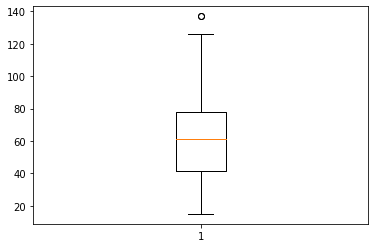

In [8]:
plt.boxplot(customer_data["Annual Income (k$)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1887fc8d5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1887f927358>,
 'boxes': [<matplotlib.lines.Line2D at 0x1887fc8d0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1887f96a9e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1887f978b00>],
 'means': []}

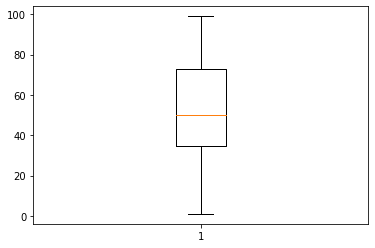

In [9]:
plt.boxplot(customer_data["Spending Score (1-100)"])

In [10]:
X = customer_data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].to_numpy()

In [151]:
def init_centroids(K, data=X):
    '''Returns a random initialization of centroids for K-means process
    
    Parameters
    ------------
    K : int
        the number of centroids you want to return
    data : numpy.array
        the input data
    '''
    return np.random.permutation(data)[:K]

In [152]:
?np.inner

In [131]:
def plus_plus(K, data=X):
    '''Uses the K-means++ algorithm to initialize 
    the centroids far away from eachother
    
    Credit goes to user Steve Tjoa from https://stackoverflow.com/questions/5466323/how-could-one-implement-the-k-means-algorithm 
    for the Python implementation
    
    Parameters:
    -------------
    K : int
        the number of centroids you want to return
    data : numpy.array
        the input data
        
    Returns:
    -------------
    centroids : list of numpy arrays
        the initialized centroids
    '''
    centroids = [data[0]]
    for _ in range(1, K):
        dist_squared = np.array([min([np.inner(c-x, c-x) for c in centroids]) for x in data])
        probs = dist_squared / dist_squared.sum()
        cumprobs = probs.cumsum()
        r = np.random.rand()

        for (j, p) in enumerate(cumprobs):
            if r < p:
                i = j
                break
        centroids.append(data[i])
    return centroids

In [13]:
def find_closest_centroids(centroids, data=X):
    '''Assigns each sample to a centroid
    
    Parameters
    ------------
    centroids : list of numpy arrays
        the initialized centroids
    data : numpy.array
        the input data
        
    Returns
    ------------
    idx : numpy.array
        the assigned group of each centroid
    '''
    m = len(data)
    idx = np.zeros(m)
    K = len(centroids)
    for i in range(m):
        sample = data[i]
        min_dist = 4206969420
        for j in range(K):
            centroid = centroids[j]
            distance = np.linalg.norm(sample - centroid)
            if distance < min_dist:
                min_dist = distance
                idx[i] = j
    return idx

In [14]:
def compute_centroids(idx, data=X):
    '''Returns means of datapoints assigned to each centroid, sets this as new centroid
        
    Parameters
    ------------
    idx : numpy.array
        the assigned group of each centroid
    data : numpy.array
        the input data
    '''
    unique_centroids = np.unique(idx)
    centroid_means = [np.mean(data[idx == val], axis = 0) for val in unique_centroids]
    return np.array(centroid_means) 

In [16]:
def run_k_means(centroids, max_iters, data = X):
    idx = []
    for i in range(max_iters):
        idx = find_closest_centroids(centroids)
        centroids = compute_centroids(idx)
    return (centroids, idx)

In [ ]:
#elbow method to determine how many clusters to use
def elbow_method(data=X):
    ''' This function uses the elbow method to determine how many clusters to segment the data into.
        It plots a graph of the mean distortions of each of the cluster numbers from 1 to 10
    
    Parameters
    ------------
    data : numpy.array
        the input data
    '''
    distortions = []
    k_list = list(range(1, 10))
    m = len(X)
    for k in k_list:
        centroids, idx = run_k_means(plus_plus(k), 50)
        distortions.append(np.sum(np.min(cdist(X, centroids, "euclidean"), axis = 1))/m) 
    plt.plot(k_list, distortions)

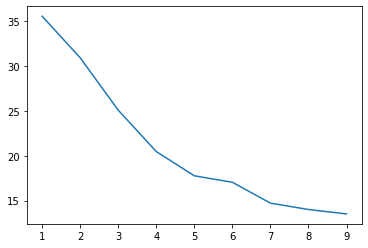

In [146]:
elbow_method(X)

Text(0.5, 0, 'Spending Score (1-100)')

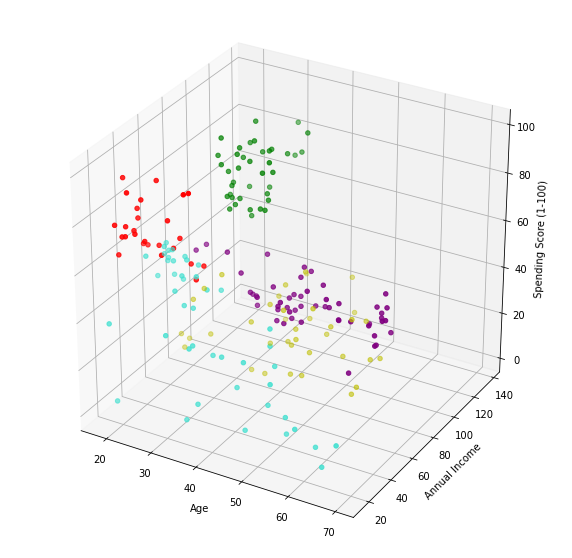

In [148]:
initial_centroids = plus_plus(5)
clusters, idx = run_k_means(initial_centroids, 100)
color_map = {i:color for (i, color) in zip(np.unique(idx), ['r', 'g', 'y', "purple", "turquoise", "blue"])}
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(customer_data["Age"], customer_data["Annual Income (k$)"], customer_data["Spending Score (1-100)"], c=[color_map[i] for i in idx])
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score (1-100)")

In [18]:
customer_data["Group"] = idx